## Methodology for Model Accuracy Assessment using Artificial Data

### Data Generation
1. Develop a class called `TimeSeries` to generate artificial time-series data resembling digital signals with noise.
2. The `TimeSeries` class takes the following inputs:
   - `states`: A list of distinct states or signal levels that the artificial data will switch between.
   - `n_switches`: The number of times the signal will switch between states throughout the length of the dataset.
   - `length` (optional): The total length or number of samples in the generated dataset (default is 600,000).
3. Within the `TimeSeries` class:
   - Initialize an empty list to store the generated data (`self.data`) and corresponding state labels (`self.labels`).
   - Define a noise level (`self.noise`) to introduce random noise to the signal.
   - Implement a `generate` method to create the artificial dataset:
     - Determine the points in time where the signal will switch states (`switch_points`).
     - For each time step `i`:
       - Check if `i` is a switch point, and if so, randomly select a new state from `self.states`.
       - Generate the signal value by adding Gaussian noise (mean 0, standard deviation `self.noise`) to the current state value.
       - Append the generated signal value to `self.data` and the corresponding state label to `self.labels`.
4. Include additional methods in the `TimeSeries` class to:
   - Plot the generated signal data with state labels using different colors.
   - Return the signal data and state labels as NumPy arrays or pandas DataFrames.

### Model Application and Evaluation
1. Generate an instance of the `TimeSeries` class with the desired states and number of switches.
2. Obtain the artificial signal data and corresponding state labels from the `TimeSeries` instance.
3. Apply your signal processing and state estimation algorithms to the artificial signal data, following the same steps as you would for real-world data.
4. Estimate the number of states present in the artificial signal using techniques such as:
   - Histogram analysis with peak detection and DBSCAN clustering.
   - Gaussian Mixture Models (GMM) with model selection based on information criteria (e.g., BIC).
   - Bayesian Gaussian Mixture Models (BGMM) with the number of components determined from previous steps.
5. Classify each data point in the artificial signal into the estimated states or clusters using the BGMM predictions.
6. Compute the confidence scores or posterior probabilities of the classifications.
7. Visualize the classified signal data, with point transparency or color representing the confidence of the classification.
8. Evaluate the accuracy of your model by comparing the estimated state labels with the true state labels provided by the `TimeSeries` instance.
   - Use metrics such as accuracy score or confusion matrix to quantify the model's performance.
9. Repeat the above steps for different configurations of the artificial data (e.g., varying the number of states, noise levels, or switching patterns) to assess the model's robustness and limitations.

### Interpretation and Reporting
1. Analyze the performance of your model on the artificial data and identify potential strengths and weaknesses.
2. Compare the model's accuracy on the artificial data with its performance on real-world data, if available.
3. Discuss the implications of the artificial data experiments for the applicability and limitations of your approach in the biological context.
4. Suggest potential improvements or alternative strategies based on the insights gained from the artificial data analysis.
5. Present the results, including visualizations of the classified artificial signals and quantitative performance metrics, in a clear and interpretable manner.

# Model Accuracy Assessment Using Artificial Data

## Introduction
Evaluating the performance and accuracy of signal processing models is crucial, especially in the context of analyzing biological signals with inherent noise and uncertainties. While real-world experimental data provides a direct means of testing and validating models, access to ground truth labels or known underlying states is often limited. To address this challenge, we generated artificial time-series data resembling noisy digital signals, with controllable parameters and known state labels. This approach allowed us to quantitatively assess the accuracy of our state estimation and clustering algorithms under various conditions.

## Data Generation
We developed a class called `TimeSeries` to generate artificial time-series data with predefined states, state transition dynamics, and noise levels. The `TimeSeries` class takes three main inputs: a list of distinct states or signal levels, the number of times the signal will switch between states throughout the dataset (`n_switches`), and the total length or number of samples in the generated dataset (default is 600,000).

Within the `TimeSeries` class, we initialized empty lists to store the generated data (`self.data`) and corresponding state labels (`self.labels`). We also defined a noise level (`self.noise`) to introduce random Gaussian noise to the signal, simulating real-world uncertainties.

The `generate` method within the `TimeSeries` class creates the artificial dataset by determining the points in time where the signal will switch states (`switch_points`). For each time step, the method checks if it is a switch point, and if so, randomly selects a new state from the predefined list of states. The signal value is then generated by adding Gaussian noise (mean 0, standard deviation `self.noise`) to the current state value. The generated signal value and corresponding state label are appended to `self.data` and `self.labels`, respectively.

Additional methods in the `TimeSeries` class allow for plotting the generated signal data with state labels using different colors, as well as returning the signal data and state labels as NumPy arrays or pandas DataFrames for further analysis.

## Model Application and Evaluation
We generated instances of the `TimeSeries` class with various configurations of states, number of switches, and noise levels. We then applied our signal processing and state estimation algorithms to the artificial signal data, following the same steps as we would for real-world data.

To estimate the number of states present in the artificial signal, we employed techniques such as histogram analysis with peak detection and DBSCAN clustering, Gaussian Mixture Models (GMM) with model selection based on information criteria (e.g., BIC), and Bayesian Gaussian Mixture Models (BGMM) with the number of components determined from previous steps.

After estimating the number of states, we classified each data point in the artificial signal into the estimated states or clusters using the BGMM predictions. We computed the confidence scores or posterior probabilities of the classifications and visualized the classified signal data, with point transparency or color representing the confidence of the classification.

To evaluate the accuracy of our model, we compared the estimated state labels with the true state labels provided by the `TimeSeries` instance. We used metrics such as accuracy score or confusion matrix to quantify the model's performance.

## Results and Discussion
Our experiments with artificial data revealed valuable insights into the strengths and limitations of our approach. We found that our model performed well in scenarios with distinct state levels and moderate noise levels, achieving high accuracy scores. However, as the noise levels increased or the state levels became more overlapped, the accuracy deteriorated.

Interestingly, we observed that the model's performance on artificial data with certain configurations closely resembled its performance on real-world data, suggesting that the artificial data generation process effectively captured relevant characteristics of the biological signals.

While the artificial data experiments provided a controlled environment for model evaluation, we acknowledge that real-world data may exhibit additional complexities and patterns not fully captured by the artificial data generation process. Therefore, we recommend interpreting the results from artificial data in conjunction with thorough validation on real-world experimental data and domain knowledge.

## Conclusion
The use of artificially generated time-series data proved to be a valuable tool for assessing the accuracy and robustness of our signal processing and state estimation algorithms. By generating data with known state labels and controllable parameters, we could quantitatively evaluate our model's performance under various conditions and identify potential limitations or areas for improvement. This approach complemented our analysis of real-world data, providing insights into the applicability and generalizability of our methods in the context of biological signal analysis.

In [3]:
from random import randint, randrange
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from sim import moving_average
import scipy.stats as st
from scipy.stats._continuous_distns import _distn_names


In [21]:
import numpy as np
from scipy.linalg import expm


#from .myTools import randIntNonUniform,getSteadyStateDist

# If P is a square row-stochastic matrix, returns the
# normalized (sum 1) eigenvector associated with the
# unit eigenvalue.
#
# For Markov chains with state transition probability
# matrix P, this vector gives the steady state
# distribution over the states.
#
# If P does not have a unit eigenvalue, returns None.
# However, sensible results are not guaranteed for
# arbitrary matrices.
def getSteadyStateDist(P):
    tolerance = 1e-10

    # need the left eigenvectors
    [u, v] = np.linalg.eig(np.transpose(P))
    v = np.transpose(v)

    index = 0
    for i in u:
        if np.abs(i - 1.) < tolerance:
            return np.real(v[index, :] / np.sum(v[index, :]))
        index += 1

    return None


# p is a vector of probabilities; p must sum to 1
# returns a discrete random variable supported in {0,1,...,len(p)-1}
# with the distribution given by {p[0],p[1],...,p[len(p)-1]}
def randIntNonUniform(p):
    q = np.random.rand()
    r = 0
    for i in range(0, len(p)):
        r += p[i]
        if (q < r):
            return i

    # should never happen
    return -1


# class representing CFTR
#
class Receptor:

    def __init__(self, C1aExitProb=0.1, TwoConductanceStates=False):

        # matrix of rates
        R = np.array(
            [[-9., 9., 0., 0., 0., 0., 0.],  # C1a
             [5., -12.7, 7.7, 0., 0., 0., 0.],  # C1b
             [0., 5.8, -10.7, 4.9, 0., 0., 0.],  # C2
             [0., 0., 10., -17.1, 7.1, 0., 0.],  # O1
             [0., 0., 0., 0., -3., 3., 0.],  # O2
             [0., 0., 0., 0., 7., -13., 6.],  # C3
             [1.7, 0., 0., 0., 0., 12.8, -14.5]])  # C4

        dt = 0.01

        # we specify C1aExitProbability to stay compatible with earlier versions
        # but what it really means is the out rate from C1a normalized by dt
        R[0, 0] = -1 * C1aExitProb / dt
        R[0, 1] = C1aExitProb / dt

        #self.P0 = np.eye(7) + R*dt
        self.P0 = expm(dt * R)

        # C1aExitProb is [ATP] * 9000
        self.P1 = None  # self.P1 used to have meaning but is now unused

        self.Pmask = np.array(
            [[1., 1., 0., 0., 0., 0., 0.],  # C1a
             [1., 1., 1., 0., 0., 0., 0.],  # C1b
             [0., 1., 1., 1., 0., 0., 0.],  # C2
             [0., 0., 1., 1., 1., 0., 0.],  # O1
             [0., 0., 0., 0., 1., 1., 0.],  # O2
             [0., 0., 0., 0., 1., 1., 1.],  # C3
             [1., 0., 0., 0., 0., 1., 1.]])  # C4)

        if (TwoConductanceStates is True):
            self.statemap = [0., 0., 0., 1., 2., 0., 0.]
        else:
            self.statemap = [0., 0., 0., 1., 1., 0., 0.]


class Simulator:

    def __init__(self, receptor):
        self.P0 = receptor.P0
        self.statemap = receptor.statemap
        self.px = None

    # returns two lists, states and ion channels, given input sequence
    def getReceptorState(self, n):
        r = np.zeros(n)
        c = np.zeros(n)
        initState = randIntNonUniform(getSteadyStateDist(self.P0))
        for i in range(0, n):
            if (i > 0):
                r[i] = randIntNonUniform(self.P0[int(r[i - 1])])
            else:
                r[i] = randIntNonUniform(self.P0[int(initState)])

            c[i] = self.statemap[int(r[i])]

        return r, c
    
    def getNoisyReceptorState(self, c):
        # get noise from IonChannel class
        ion_channel = IonChannel()
        open_noise = ion_channel.open(size=len(c))
        close_noise = ion_channel.close(size=len(c))
        noisy_c = np.where(c == 1, open_noise, close_noise)
        return noisy_c

    


class IonChannel:
    def __init__(self, open_signal_mag=1.4, closed_signal_mag=0.58):
        self.open_signal_mag = open_signal_mag
        self.closed_signal_mag = closed_signal_mag

    def open(self, size=1):
        """genhyperbolic noise for open state"""
        params = (1.9865096704542702,
                  0.00199882860659155,
                  -0.0005556910258636614,
                  self.open_signal_mag,
                  0.0002071081765532621)
        genhyperbolic = st.genhyperbolic
        # from params
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        # Get sane start and end points of distribution
        start = genhyperbolic.ppf(0.01, *arg, loc=loc, scale=scale) if arg else genhyperbolic.ppf(0.01, loc=loc,
                                                                                                  scale=scale)
        end = genhyperbolic.ppf(0.99, *arg, loc=loc, scale=scale) if arg else genhyperbolic.ppf(0.99, loc=loc,
                                                                                                scale=scale)

        # generate random numbers from the distribution
        return genhyperbolic.rvs(*params, size=size)

    def close(self, size=1):
        """genhyperbolic noise for closed state"""
        params = (3.6662368635821796,
                  0.5836326667155399,
                  0.16863569591265098,
                    self.closed_signal_mag,
                  0.024246693602449965)
        genhyperbolic = st.genhyperbolic
        # from params
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        # Get sane start and end points of distribution
        start = genhyperbolic.ppf(0.01, *arg, loc=loc, scale=scale) if arg else genhyperbolic.ppf(0.01, loc=loc,
                                                                                                  scale=scale)
        end = genhyperbolic.ppf(0.99, *arg, loc=loc, scale=scale) if arg else genhyperbolic.ppf(0.99, loc=loc,
                                                                                                scale=scale)

        # generate random numbers from the distribution
        return genhyperbolic.rvs(*params, size=size)




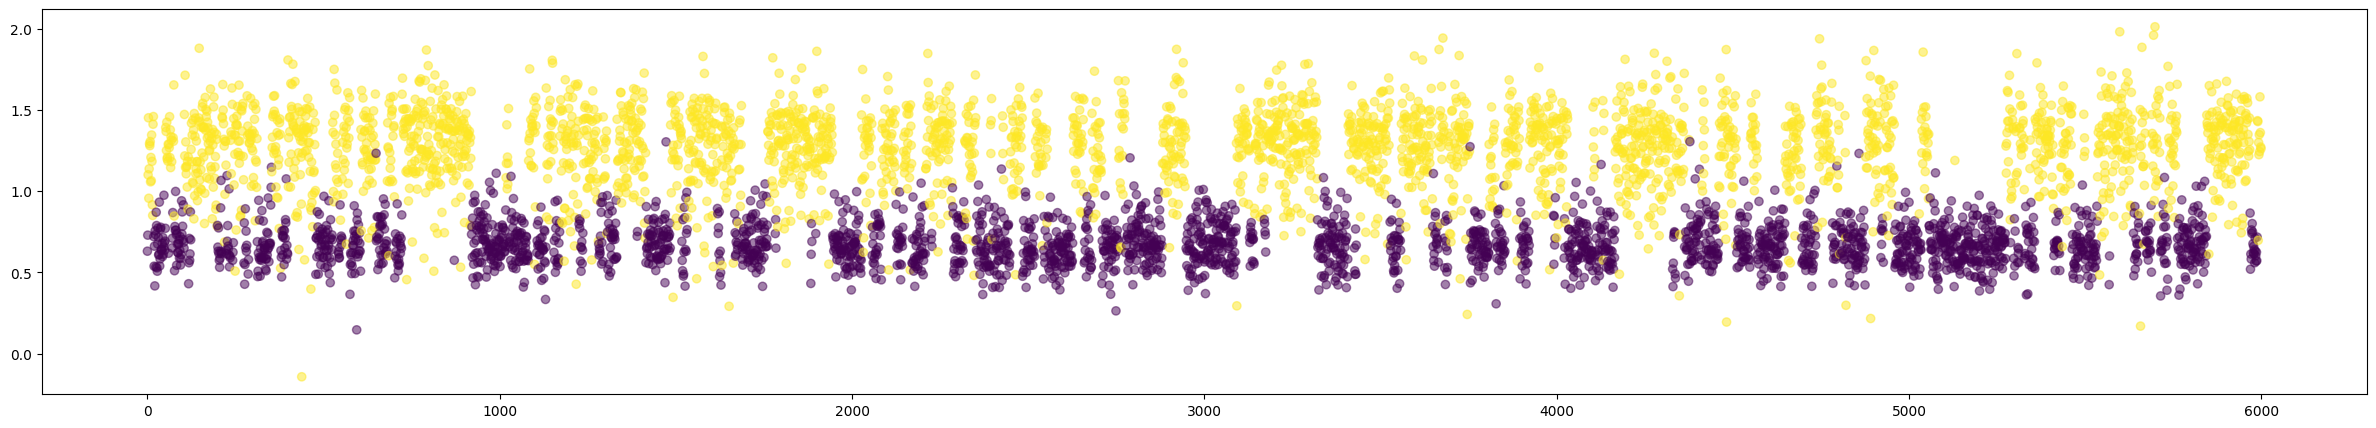

In [36]:
s = Simulator(Receptor())
r, c = s.getReceptorState(6000)
noisy_c = s.getNoisyReceptorState(c)
plt.figure(figsize=(30, 5))
plt.scatter(range(len(noisy_c)), noisy_c, c=c, cmap='viridis', alpha=0.5)

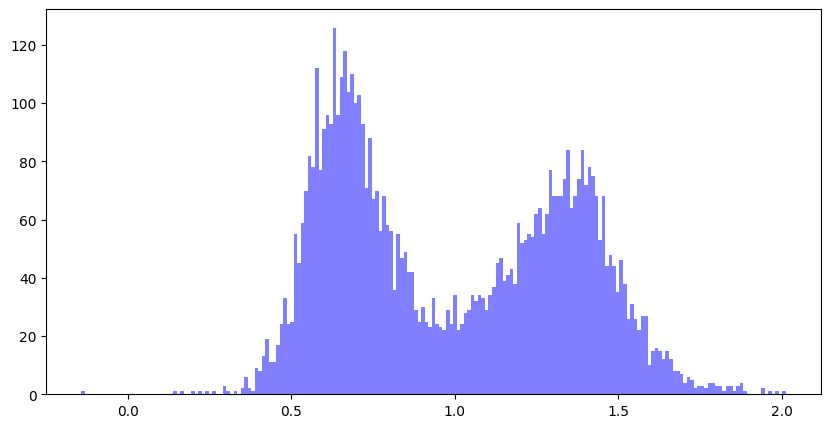

In [46]:
# histogram of noisy_c
bins = np.linspace(min(noisy_c), max(noisy_c), 200)
np.digitize(noisy_c, bins)
# plot the bins
plt.figure(figsize=(10, 5))
hists = plt.hist(noisy_c, bins=bins, alpha=0.5, color='b')


In [42]:
"""this class produces a timeseries dataset of a digital signal with noise. It takes a list of states and a list of probabilities of transitioning to each state. It has 600000 samples."""


class TimeSeries:
    def __init__(self, states, n_switches, length=600000):
        self.states = states
        self.n_switches = n_switches
        self.data = []
        self.labels = []
        self.length = length
        self.state = 0
        self.noise = 0.30
        self.generate(self.length)

    def generate(self, length):
        """Throughout the length of the dataset, the state will change n_switches times."""
        # pick when the state will change
        switch_points = [randint(0, length) for _ in range(self.n_switches)]
        switch_points.sort()
        switch_points.append(length)
        switch_points = [0] + switch_points
        # generate the data
        for i in range(length):
            if i in switch_points:
                self.state = randrange(len(self.states))
            # noise = normal distribution with mean 0 and std 1
            self.data.append(self.states[self.state] + np.random.normal(0, self.noise))
            self.labels.append(self.state)

    def plot(self):
        plt.figure(figsize=(30, 5))
        plt.scatter(range(len(self.data[::100])), self.data[::100], c=self.labels[::100], cmap='viridis', alpha=0.5)
        plt.show()

    def get_data(self):
        return np.array(self.data).reshape(-1, 1)

    def get_labels(self):
        return np.array(self.labels)

    def get_abf(self):
        return DataFrame({'signal': self.data, 'time': range(len(self.data)), 'labels': self.labels})

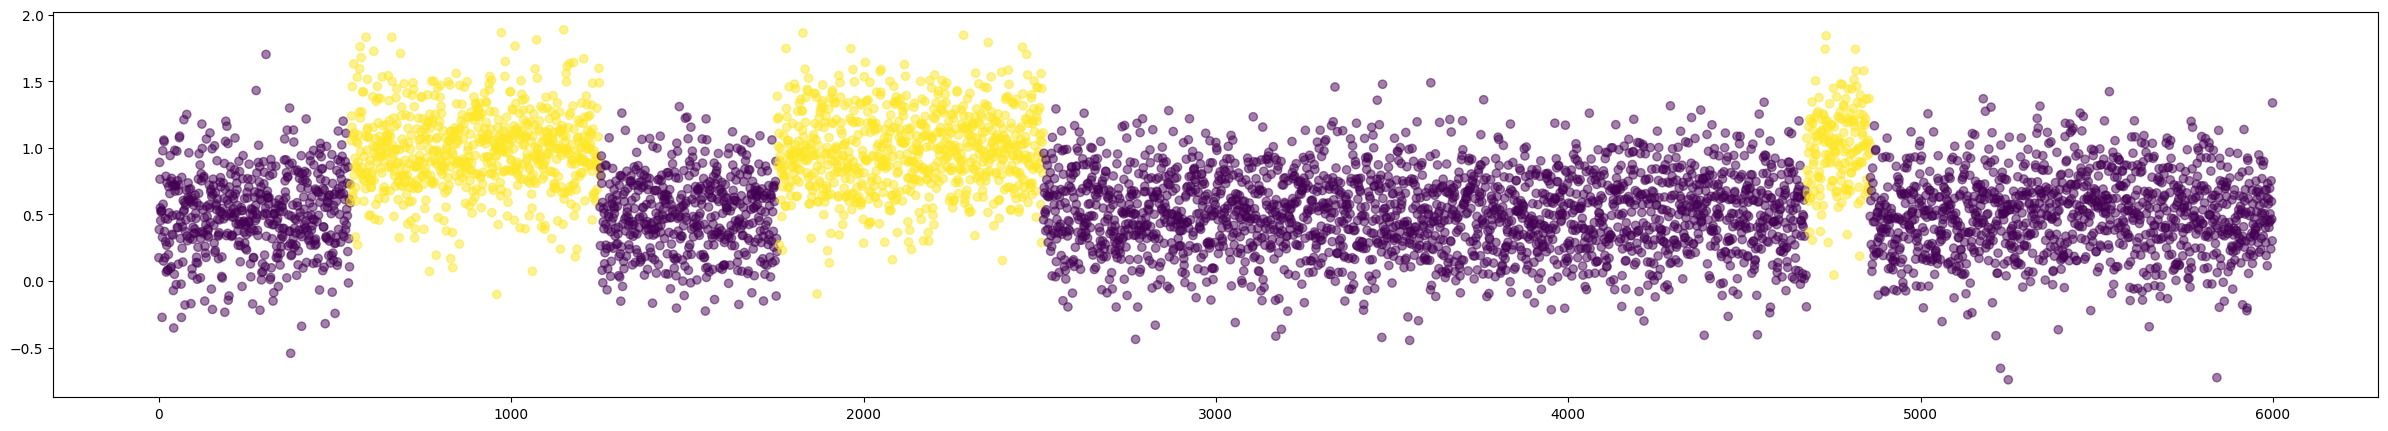

In [43]:
data = TimeSeries([.5, 1.0], 12)
df = data.get_abf()
data.plot()

## Find the number of states

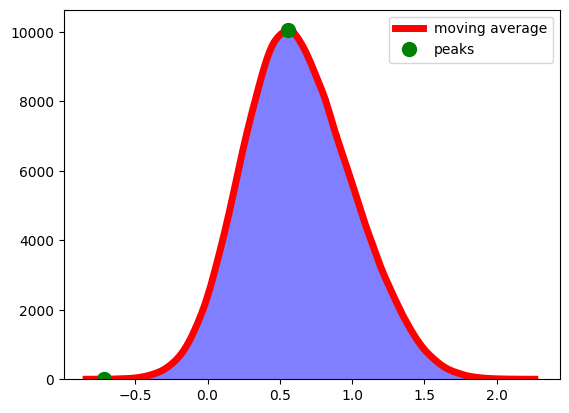

Number of states: 2


In [44]:
# df.signal find the bins distribution

bins = np.linspace(df.signal.min(), df.signal.max(), 200)
np.digitize(df.signal, bins)
# plot the bins
hists = plt.hist(df.signal, bins=bins, alpha=0.5, color='b')

# find the moving average of hists
ma = moving_average(hists[0], 5)
ma = moving_average(ma, 5)
plt.plot(hists[1][:-1], ma, 'r', linewidth=5, label='moving average')

# find number of peaks in the moving average that are above a certain threshold
threshold = 0
peaks = np.diff(np.sign(np.diff(ma))) < 0
peaks = np.where(peaks)[0] + 1
number_of_states = sum(ma[peaks] > threshold)
plt.plot(hists[1][peaks][ma[peaks] > threshold], ma[peaks][ma[peaks] > threshold], 'o', markersize=10, label='peaks',
         color='g')
plt.legend()
plt.show()

print(f'Number of states: {number_of_states}')

Number of clusters: 2


array([0, 1])

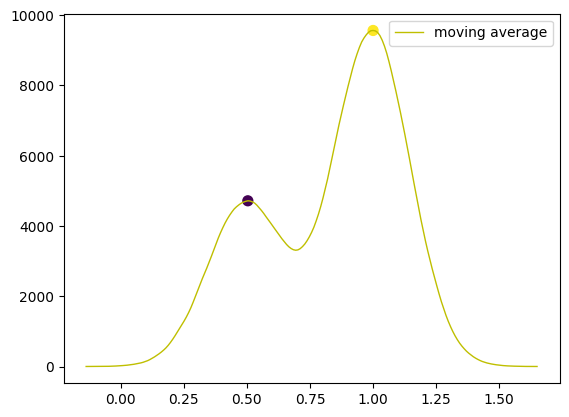

In [36]:
# DBSCAN on hists[1][peaks], ma[peaks]
peaks_coords = np.array(list(zip(hists[1][peaks], ma[peaks])))
# remove peaks that are less than the threshold
threshold = 5
peaks_coords = peaks_coords[ma[peaks] > threshold]

dbscan = DBSCAN(eps=10, min_samples=1)
dbscan.fit(peaks_coords)
labels = dbscan.labels_
n_clusters_ = len(set(labels))  # - (1 if -1 in labels else 0)
print(f'Number of clusters: {n_clusters_}')

# plot the clusters
plt.scatter(peaks_coords[:, 0], peaks_coords[:, 1], c=labels, cmap='viridis', s=50, alpha=1, marker='o')
plt.plot(hists[1][:-1], ma, 'y', linewidth=1, label='moving average', alpha=1)
plt.legend()
labels

## Classify the signal

In [37]:
bgm = BayesianGaussianMixture(n_components=n_clusters_, random_state=42).fit(df.signal.values.reshape(-1, 1))
bgm.means_

array([[0.9999816 ],
       [0.50027994]])

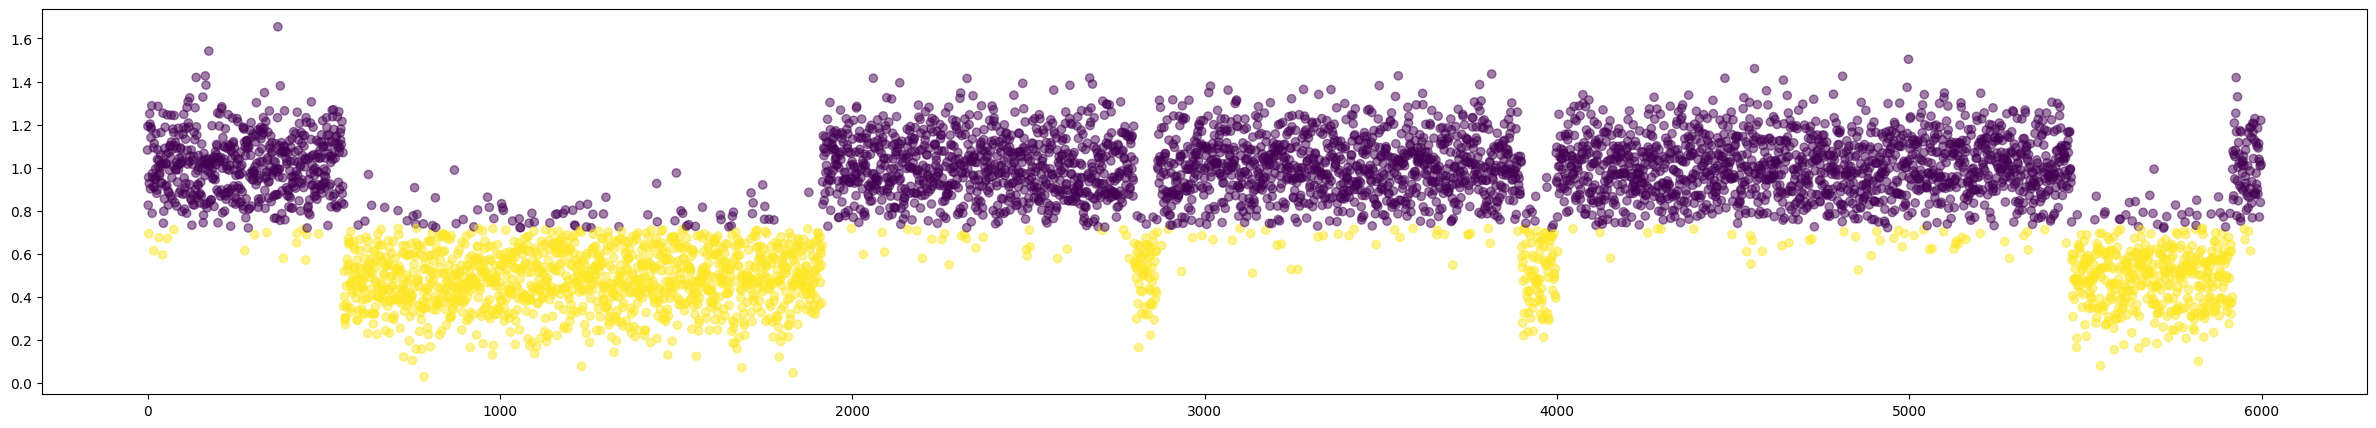

In [38]:
predicted = bgm.predict(df.signal.values.reshape(-1, 1))
df['predicted'] = predicted
conf = bgm.predict_proba(df.signal.values.reshape(-1, 1))
# desc sort conf axis
conf = np.sort(conf, axis=1)[:, ::-1]
df['conf'] = conf[:, 0]

plt.figure(figsize=(30, 5))
plt.scatter(range(len(df.signal[::100])), df.signal[::100], c=df.predicted[::100], cmap='viridis', alpha=0.5)

In [39]:
df

,signal,time,labels,predicted,conf
0,1.081616,0,1,0,0.999666
1,0.855897,1,1,0,0.954127
2,0.969376,2,1,0,0.996073
3,1.040041,3,1,0,0.999168
4,1.195997,4,1,0,0.999973
...,...,...,...,...,...
599995,0.871458,599995,1,0,0.967016
599996,1.097582,599996,1,0,0.999765
599997,1.257028,599997,1,0,0.999993
599998,1.122093,599998,1,0,0.999863


In [40]:
# find the mapping between df.predicted.value_counts() and df.labels.value_counts() based on similarity of occurences
a = df.predicted.value_counts().index
b = df.labels.value_counts().index
mapping = {}
for i in a:
    mapping[i] = b[np.argmax([np.sum(df.labels[df.predicted == i] == j) for j in b])]

df['predicted'] = df.predicted.map(mapping)
mapping

{0: 1, 1: 0}

In [41]:
accuracy_score(df.labels, df.predicted)

0.9559566666666667